<a href="https://colab.research.google.com/github/sknjoroge/cancer-logistic-regression/blob/main/Transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
#Step 1: Create synthetic traffic dataset
np.random.seed(42)

def generate_traffic_data(num_samples=1000):
    data = []
    for i in range(num_samples):
        # Time features
        hour = np.random.randint(0, 24)
        day_of_week = np.random.randint(0, 7)
        is_weekend = 1 if day_of_week >= 5 else 0

        # Base traffic volume pattern:
        # Morning peak at 7-9 AM, evening peak at 5-7 PM on weekdays
        base_volume = 20
        if not is_weekend:
            if 7 <= hour <= 9:
                base_volume += np.random.randint(50, 100)
            elif 17 <= hour <= 19:
                base_volume += np.random.randint(60, 120)
            else:
                base_volume += np.random.randint(5, 30)
        else:
            # Weekend lower peaks
            if 12 <= hour <= 14:
                base_volume += np.random.randint(40, 70)
            else:
                base_volume += np.random.randint(5, 20)

        # Add some noise
        volume = base_volume + np.random.normal(0, 5)
        volume = max(0, volume)  # ensure non-negative

        data.append([hour, day_of_week, is_weekend, volume])
    df = pd.DataFrame(data, columns=['hour', 'day_of_week', 'is_weekend', 'traffic_volume'])
    return df

df = generate_traffic_data(2000)
print("Sample of generated dataset:")
print(df.head())




Sample of generated dataset:
   hour  day_of_week  is_weekend  traffic_volume
0     6            3           0       42.238443
1     6            1           0       50.615149
2    22            2           0       36.395206
3    23            2           0       51.052576
4    20            1           0       45.652628


In [3]:

# Step 2: Prepare data for modeling
X = df[['hour', 'day_of_week', 'is_weekend']]
y = df['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

Model MAE: 9.19
Model RMSE: 11.58


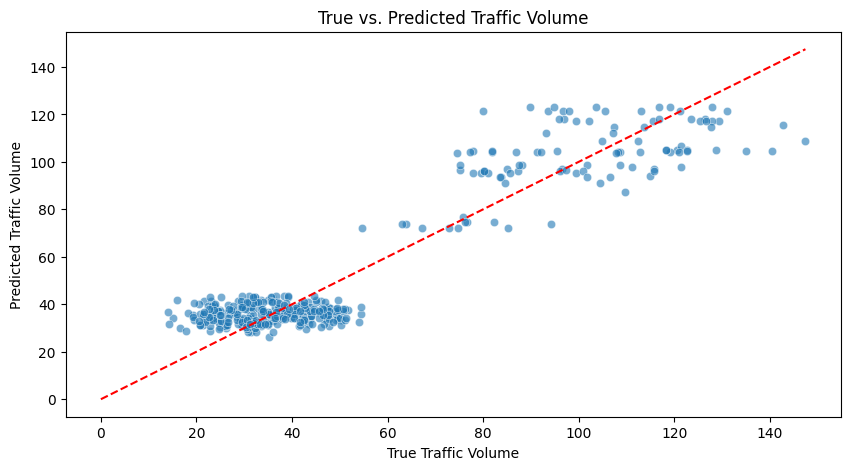

In [4]:

# Step 3: Evaluate the model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model MAE: {mae:.2f}")
print(f"Model RMSE: {rmse:.2f}")

# Plot true vs predicted traffic volume for test set
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("True Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("True vs. Predicted Traffic Volume")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.show()